In [1]:
# PDF samples

In [2]:
from src.PDF.xPDF import InitializePDF as intPDF
import src.PDF.xPDF as xPDF
import numpy as np
from uncertainties import ufloat
import matplotlib.pyplot as plt
import src.GPD.dataGenerator as dG


In [3]:
myPDFInt = intPDF("MSHT20nnlo_as118")

LHAPDF 6.5.4 loading all 65 PDFs in set MSHT20nnlo_as118
MSHT20nnlo_as118, version 4; 65 PDF members
LHAPDF 6.5.4 loading /opt/homebrew/anaconda3/envs/MMGPDs/share/LHAPDF/MSHT20nnlo_as118/MSHT20nnlo_as118_0000.dat
MSHT20nnlo_as118 PDF set, member #0, version 4; LHAPDF ID = 27400


In [4]:
#PDFwUnc(PDFARGS,flavourKey,Q2,x):

yyy =xPDF.PDFwUnc(myPDFInt,"g",0.25,4)
yyy

0.41783056+/-0.020256817852885658

In [5]:
yyy.n  # Nominal value

0.41783056

In [6]:
yyy.s #Uncertainty Value

0.020256817852885658

In [7]:
dataX = dG.genSkewedData(0,1,1000,2)
result = []
for itemx in dataX:
    result.append(xPDF.PDFwUnc(myPDFInt,"ubar",itemx, 10))

In [8]:
# Extracting nominal values and standard deviations
y_values = np.array([y.n for y in result])
y_errors = np.array([y.s for y in result])


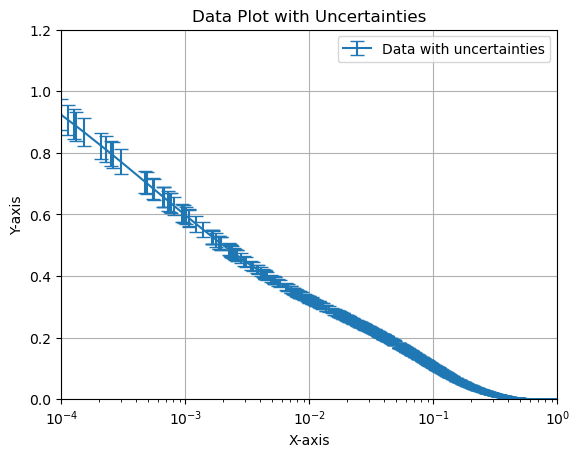

In [9]:
plt.errorbar(dataX, y_values, yerr=y_errors, fmt='-', capsize=5, label='Data with uncertainties')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Plot with Uncertainties')
plt.xlim(1e-4,1)
plt.ylim(0,1.2)
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()
